### Check that the GPU is working

In [32]:
! nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

NVIDIA GeForce RTX 4070 Ti, 12282 MiB, 5249 MiB


## Install Diffusers library

Here is the command to install diffusers, transformers, torch and accelerate libs:

In [33]:
# ! pip install --upgrade diffusers transformers torch accelerate

# To have correctly configured the versions of the different libraries in the anaconda kernel to use cuda, these are the ones I have used
! pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


## Import libraries

In [34]:
import os
import torch
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

## Check Status

In [35]:
print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

PyTorch version: 2.2.0+cu121
**********
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Fri_Dec_17_18:28:54_Pacific_Standard_Time_2021
Cuda compilation tools, release 11.6, V11.6.55
Build cuda_11.6.r11.6/compiler.30794723_0
**********
CUDNN version: 8801
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 4070 Ti


## Create an output folder

Check if output directory exists. If folder doesn't exist, then create it:

In [36]:
OUTPUT_DIR = 'comic/'

if not os.path.isdir(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

## Select model and parameters

Stable Diffusion models in HuggingFace:
- https://huggingface.co/CompVis/stable-diffusion-v1-4
- https://huggingface.co/runwayml/stable-diffusion-v1-5

In [37]:
# Model parameters ----------------------------------------
MODEL_ID = "runwayml/stable-diffusion-v1-5"

# GPU parameters  ----------------------------------------
DEVICE = "cuda"  # Use cuda to run on GPU

# Scheduler parameters ----------------------------------------
SCHEDULER = "EULER_ANCESTRAL"  # Choose from ["EULER_ANCESTRAL", "EULER", "DDIMS", "K-LMS", "PNDM"]
BETA_END = 0.012
BETA_SCHEDULE = "scaled_linear"
BETA_START = 0.00085

## Pipeline creation with a specific scheduler

If you have small GPU (less than 10GB) then you must use `float16` precision instead of `float32`.

More info about schedulers: https://github.com/huggingface/diffusers/tree/main/src/diffusers/schedulers


In [38]:
from diffusers import (
    StableDiffusionPipeline,
    DDIMScheduler,
    LMSDiscreteScheduler,
    PNDMScheduler,
    EulerDiscreteScheduler,
    EulerAncestralDiscreteScheduler,
)

def create_pipeline(model_path):
    
    SCHEDULER_MAP = {
        "DDIMS": DDIMScheduler,
        "EULER_ANCESTRAL": EulerAncestralDiscreteScheduler,
        "EULER": EulerDiscreteScheduler,
        "K-LMS": LMSDiscreteScheduler,
        "PNDM": PNDMScheduler,
    }

    scheduler = SCHEDULER_MAP[SCHEDULER](
        beta_start=BETA_START,
        beta_end=BETA_END,
        beta_schedule=BETA_SCHEDULE,
        # num_train_timesteps=NUM_TRAIN_STEPS,
    )

    pipe = StableDiffusionPipeline.from_pretrained(
        model_path,
        scheduler=scheduler,
        torch_dtype=torch.float16,
        revision="fp16",
        # safety_checker=None,
    ).to(DEVICE)

    return pipe

### Create a new pipeline. This can take a few minutes... be patient :)

In [39]:
pipe = create_pipeline(model_path=MODEL_ID)

vae\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generator method

In [40]:
INFERENCE_SEED = 1122334455

# Set seed
custom_generator = torch.Generator(device='cuda').manual_seed(INFERENCE_SEED)

def generate_image(pipe, prompt, num_img, steps=80, h=512, w=512, guidance_scale=7, strength=0.75, seed=custom_generator, save_image=True):
    print(prompt)
    image = pipe(prompt, num_inference_steps=steps, height=h, width=w, guidance_scale=guidance_scale, strength=strength, generator=seed)["images"][0]
    display(image)
    if save_image == True:
        outfilename = f'{OUTPUT_DIR}/comic_page' + str(num_img) + '.png'
        image.save(outfilename)

## Generate images

A young archaeologist discovers an ancient map in a dusty book, which promises to reveal the location of a lost treasure, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

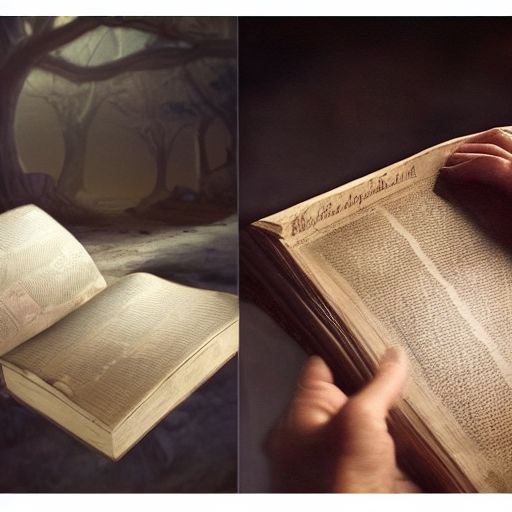

With map in hand, the archaeologist embarks on a journey into the unknown, facing dangers and challenges in his search for the treasure, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

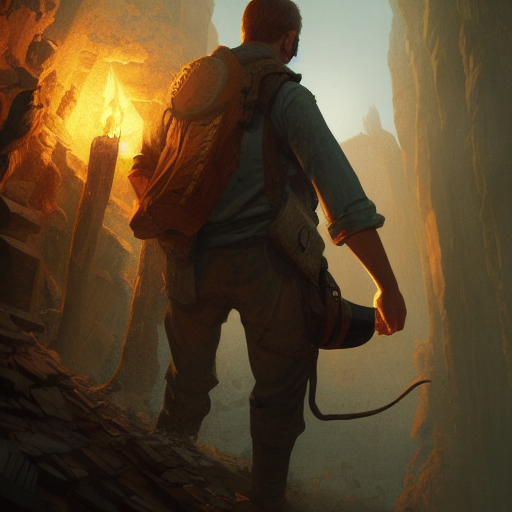

On his way, the archaeologist encounters an indigenous tribe who jealously guard the secret of the treasure and warn him about the creatures guarding the ancient relic, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

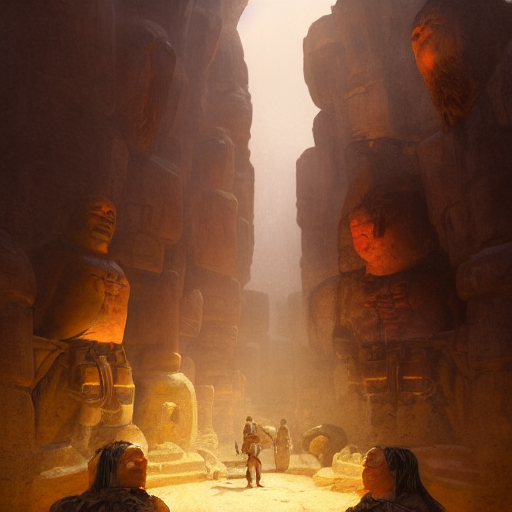

Finally, he arrives at an ancient city hidden deep in the jungle, where he discovers the ruins of an ancient temple and the glowing treasure that lies within, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

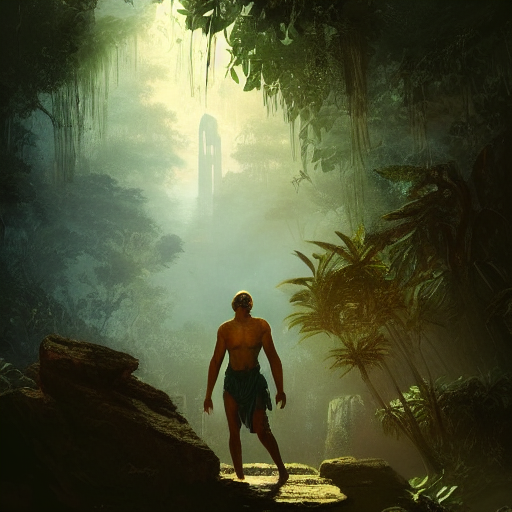

Before he can claim the treasure, however, the archaeologist awakens to an ancient curse that haunts him through the shadows of the ruined city, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

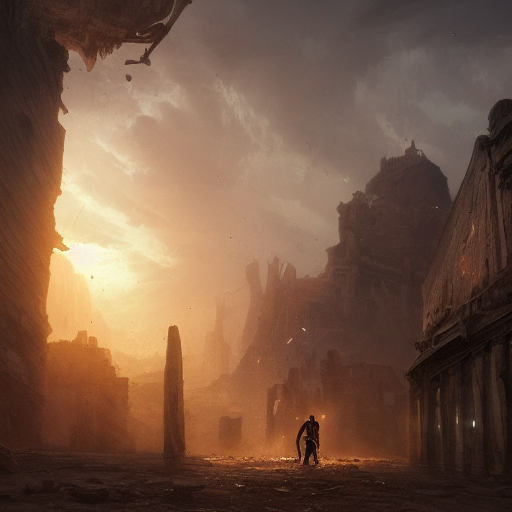

Haunted by the curse, the archaeologist is forced to confront his own fears and inner demons as he struggles to escape the clutches of the darkness that surrounds him, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

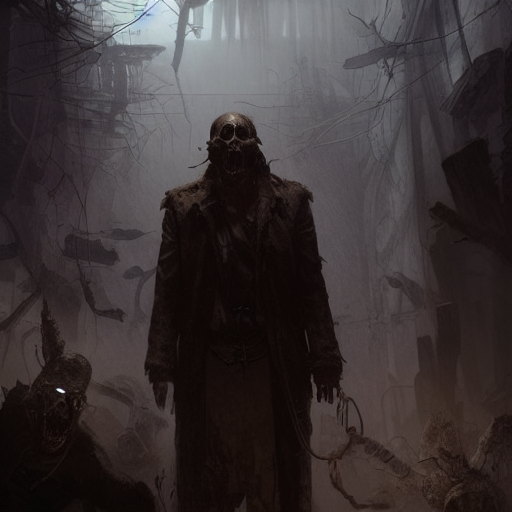

With courage and determination, the archaeologist faces a series of trials and tribulations, searching for a way out of the cursed city and protecting the treasure at all costs, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

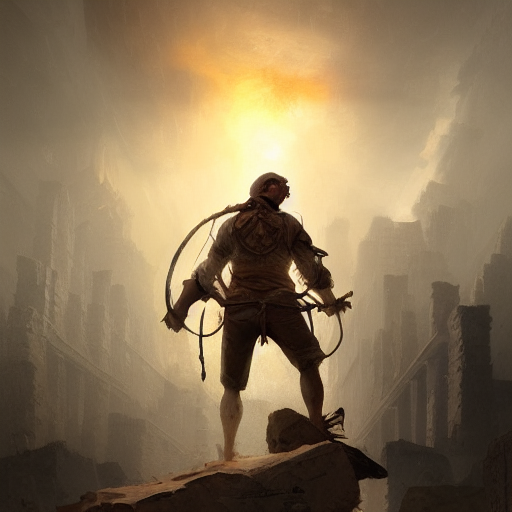

In desperation, the archaeologist finds unexpected help in the form of a lost member of the indigenous tribe, who guides him through the secret passages and labyrinths of the city, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

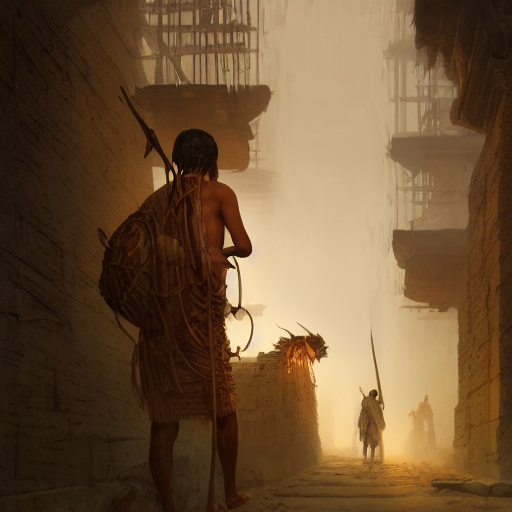

Together, the archaeologist and his new ally battle the dark forces around them, using their wits and skills to overcome every obstacle on their path to freedom, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

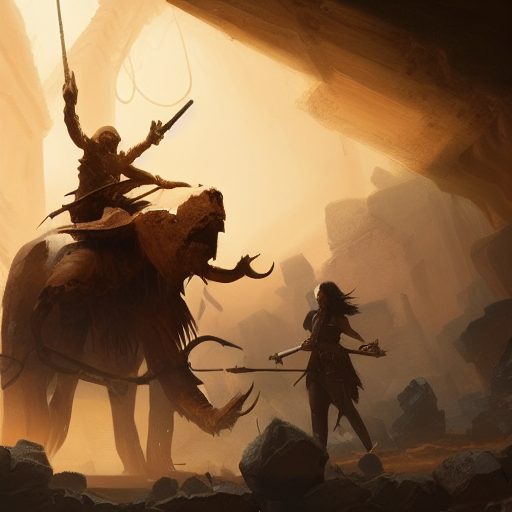

However, the curse intensifies as they approach the exit, threatening to consume them both in its voracious darkness, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

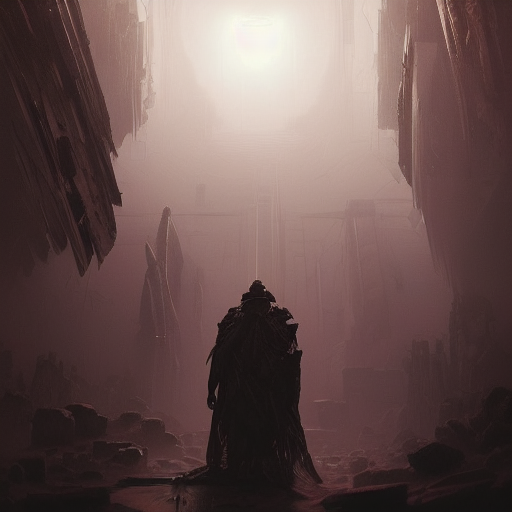

With the treasure in their possession, the archaeologist and his ally finally find their way out of the cursed city, emerging triumphant into the daylight and leaving behind the darkness that haunts them, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

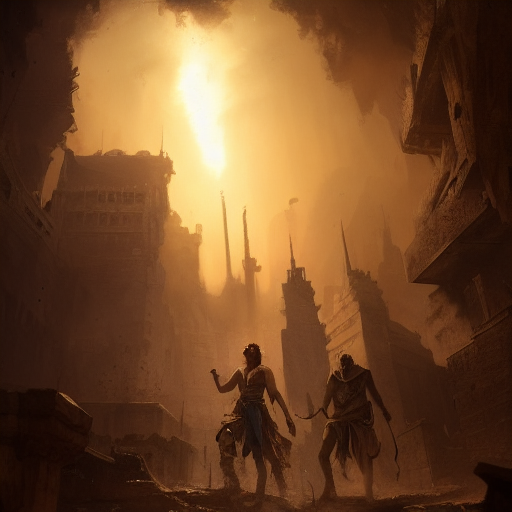

With the curse finally broken, the archaeologist returns home with treasure in hand, but also with a new understanding of the importance of courage, friendship and perseverance in the search for truth, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

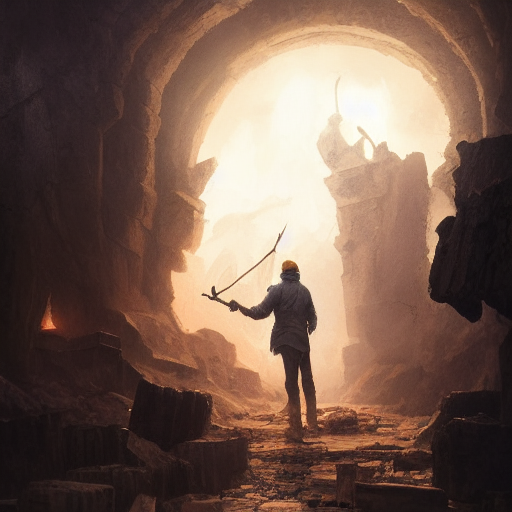

The young archaeologist shares his story with the world, inspiring others to follow their dreams and pursue their own adventures, no matter what dangers they may face along the way, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

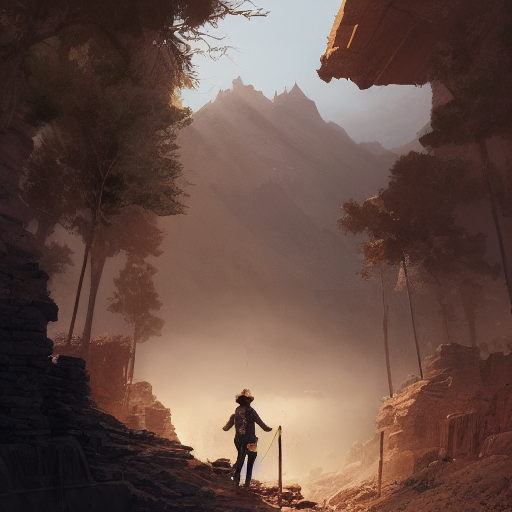

And so the story of the archaeologist and his epic quest for lost treasure becomes legend, enduring through the centuries as an example of courage and determination in the face of adversity, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting


  0%|          | 0/80 [00:00<?, ?it/s]

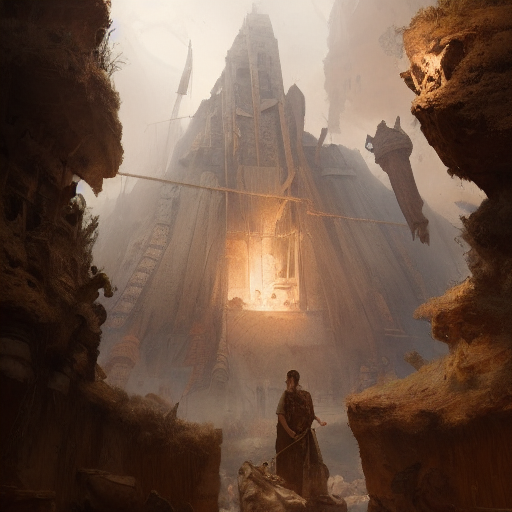

In [41]:
comic_page = 0

# Lista de prompts
prompts = [
    "A young archaeologist discovers an ancient map in a dusty book, which promises to reveal the location of a lost treasure, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "With map in hand, the archaeologist embarks on a journey into the unknown, facing dangers and challenges in his search for the treasure, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "On his way, the archaeologist encounters an indigenous tribe who jealously guard the secret of the treasure and warn him about the creatures guarding the ancient relic, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "Finally, he arrives at an ancient city hidden deep in the jungle, where he discovers the ruins of an ancient temple and the glowing treasure that lies within, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "Before he can claim the treasure, however, the archaeologist awakens to an ancient curse that haunts him through the shadows of the ruined city, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "Haunted by the curse, the archaeologist is forced to confront his own fears and inner demons as he struggles to escape the clutches of the darkness that surrounds him, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "With courage and determination, the archaeologist faces a series of trials and tribulations, searching for a way out of the cursed city and protecting the treasure at all costs, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "In desperation, the archaeologist finds unexpected help in the form of a lost member of the indigenous tribe, who guides him through the secret passages and labyrinths of the city, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "Together, the archaeologist and his new ally battle the dark forces around them, using their wits and skills to overcome every obstacle on their path to freedom, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "However, the curse intensifies as they approach the exit, threatening to consume them both in its voracious darkness, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "With the treasure in their possession, the archaeologist and his ally finally find their way out of the cursed city, emerging triumphant into the daylight and leaving behind the darkness that haunts them, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "With the curse finally broken, the archaeologist returns home with treasure in hand, but also with a new understanding of the importance of courage, friendship and perseverance in the search for truth, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "The young archaeologist shares his story with the world, inspiring others to follow their dreams and pursue their own adventures, no matter what dangers they may face along the way, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
    "And so the story of the archaeologist and his epic quest for lost treasure becomes legend, enduring through the centuries as an example of courage and determination in the face of adversity, by greg rutkowski, highly detailed, HQ, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting",
]

for prompt in prompts:
    comic_page += 1
    generate_image(pipe, prompt, comic_page)

**Aquí está la explicación sobre el modelo de lenguaje utilizado y los prompts aplicados:**


### Modelo de Lenguaje Utilizado:
El modelo de lenguaje utilizado es `runwayml/stable-diffusion-v1-5`. Este modelo es una versión de la difusión estable que se puede utilizar para generar imágenes a partir de texto descriptivo.

### Prompt Utilizado:
El prompt utilizado consiste en una lista de 15 elementos que forman una historia continua sobre un arqueólogo en busca de un tesoro perdido. Cada elemento del prompt describe una etapa diferente de la historia, desde el descubrimiento inicial del mapa hasta el regreso a casa con el tesoro. Los prompts también incluyen detalles sobre el estilo de las imágenes deseadas, como alta calidad, detalle, simetría, tendencias en ArtStation, pintura digital, arte conceptual, enfoque nítido, ilustración y iluminación cinematográfica.

### Explicación del Proceso de Generación de Imágenes:
Para generar cada imagen, se utilizó el modelo de difusión estable `runwayml/stable-diffusion-v1-5` junto con el texto del prompt correspondiente. El modelo interpreta el texto y genera una imagen que se ajusta al estilo y la descripción proporcionados en el prompt. Se aplicaron parámetros adicionales como alta calidad, detalle, simetría, enfoque nítido y una iluminación cinematográfica para garantizar que las imágenes resultantes cumplan con las especificaciones deseadas.

Cada imagen generada a partir de los prompts contribuye a contar la historia completa del arqueólogo en busca del tesoro perdido, manteniendo un estilo visual coherente y artístico en todas las imágenes.